In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set(rc={'figure.figsize':(8,10)})
#plt.rcParams['figure.figsize']= (5,5)

In [2]:
#!pip install plotly
#!pip install cufflinks
from plotly import __version__
print(__version__)
import cufflinks as cv
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
cv.go_offline()
#pd.DataFrame(new_value).iplot(kind='surface',)

5.3.1


In [3]:
import sys
sys.setrecursionlimit(4000)   #2000
print(sys.getrecursionlimit())

4000


In [4]:
size = 500
width= 10

In [5]:
#from utils import *

In [6]:
from utils import *
from configs import *

5.3.1


4000


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
CS locations
[(11, 12)]
CS locations
[(11, 12), (18, 40)]
AGENT location
[31, 6]
----------------------------------------
calculating FUTURE REWARD of each state...
----------------------------------------
[[-655. -575. -495. ... -195. -196. -197.]
 [-654. -574. -494. ... -275. -197. -198.]
 [-653. -573. -493. ... -355. -277. -199.]
 ...
 [-133. -213. -293. ... -135.  -57. -137.]
 [-213. -293. -373. ... -215. -137. -217.]
 [-293. -373. -453. ... -137. -217. -297.]]
FUTURE REWARD/Value Functions:-


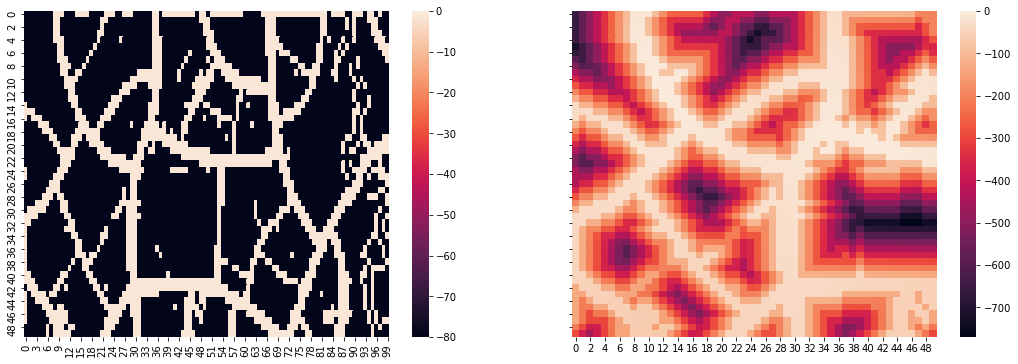

this is optimal pollicy


NameError: name 'optimal_policy' is not defined

In [7]:
from utils import *
from configs import *

if static_quality_score == True:
  Charging_time_CS = [50,10, 5]
else:
  Charging_time_CS = [0, 0, 0]
if dynamic_quality_score == True:
  Overhead_time_CS = [40, 48, 47]  # this is for pre-booking >> can be implemented to FCFS
else:
  Overhead_time_CS = [0, 0, 0 ]
actual_dynamic_overhead = list(np.zeros((len(Overhead_time_CS),)) )
if dynamic_quality_score == False:
  actual_static_overhead = Charging_time_CS.copy()
else:
  actual_static_overhead  = list(np.zeros((len(Charging_time_CS))))
stats_df = pd.DataFrame({"Charging_time":Charging_time_CS, "Overhead_time_CS":Overhead_time_CS})
no_checked_CS = 1

if static_quality_score==True or static_quality_score == True:
  print(stats_df)

if size== 1000:
  width = 20
elif size==500:
  width = 10
w = 10

if noise == True:
  #CreateNoiseImage()
  img= CreateNoiseImage(plt.imread('img4.jpg')[:size,:size,:])
  stored_image = img.copy() #
else:
  # PATH
  #img_mask = cv2.imread("../Images/dilated_5_2.jpg")[:size,:size,:] #[:1000,:1000,:]  # img4.jpg
  img = cv2.imread("../Images/img4.jpg")[:size,:size,:] #[:1000,:1000,:]  # img4.jpg
img = cv2.resize(img,(500,500))

time_limit = 5000
if battery == True:
  # Limit EV Battery
  time_limit = int(input("Battery remaining:- "))
  
"""
state:click
0       No
1       set home
2       set car
3       start optimizing
4       start game
5       loop----in 5
"""


"""
if size== 1000:
  img = cv2.resize(img,(500,500))
elif size == 500:
  img = cv2.resize(img,(500,500))

# add noise
## create noise image
if noise==True:
  #img = cv2.imread("../Images/img4_noise.jpg")[:size, :size] #[:size,:size,:] #[:1000,:1000,:]  # img4.jpg
  img = cv2.resize(img,(500,500))
"""  
#
#img = cv2.cvtColor(img, cv2.Color_BGR2RGB)
cv2.namedWindow("window")
#-optimal_value = 0
#-state =0 
#-can_initial_reward = -1

if demo == True:
  HOME = [(25,28),(19,34),(19,16)]
  count = 0
  AGENT  = (43,30)

#=======================>
def draw(event, x, y, flag, param):
    global drag
    global state
    global HOME
    global AGENT
    global optimal_value
    global img
    global Grid_shape
    global no_action
    global terminators
    global optimal_path
    global width
    global size
    global optimal_policy
    global find_optimal_CS
    global Last_CS
    global count
    
    if width == 20:
      # big rectangle
      w = 10
    elif width == 10:
      w = 10
    if event == cv2.EVENT_FLAG_LBUTTON:
        drag = True
    if event == cv2.EVENT_LBUTTONUP:
        drag=False
        #cv2.circle(img, (x,y),20,(0,0,0),3)
        if state == 111:
          """
            AGENT = [y//w, x//w]
            print("AGENT location")
            print(AGENT)
            cv2.rectangle(img, (x+w,y-w),(x-w, y+w), (250,0,0),3 )
            smart_trace()
            state=3
         """
          #-
          if demo== True:
            x = AGENT[1]*w
            y = AGENT[0]*w
          else:
            AGENT = [y//w, x//w]
          #-
          print("AGENT location")
          print(AGENT)
          cv2.rectangle(img, (x+w,y-w),(x-w, y+w), (250,0,0),3 )
          # Limit Battery
          t = optimal_value[AGENT[0],AGENT[1]]
          if  t< -1*time_limit and battery == True:
              print(f"Nearest Charging station is at {-1*t} second distance")
              print('*'*80)
          else:
              smart_trace()
          state=3
        if state == 0:
            if find_optimal_CS == True:
              HOME= Optimize_CS()[::-1]
              x = HOME[0][1]*w
              y = HOME[0][0]*w
              find_optimal_CS = False
            else:
              #-
              if demo == True:
                temp = HOME[count][0]*w, HOME[count][1]*w
                x = HOME[count][1]*w
                y = HOME[count][0]*w
                count += 1
              else:
                temp = (y//w,x//w)
                HOME.append(temp)
            print("CS locations")
            print(HOME)
            cv2.rectangle(img, (x+w,y-w),(x-w,y+w),(0,0,250),3)
            #state =1
        elif state == 1:
            # draw car
            if demo== True:
              x = AGENT[1]*w
              y = AGENT[0]*w
            else:
              AGENT = [y//w, x//w]
            #-
            print("AGENT location")
            print(AGENT)
            cv2.rectangle(img, (x+w,y-w),(x-w,y+w),(250,0,0),3)
            #state = 2
        elif state == 2:
            state = 3
            # show color
            terminators = HOME
            #print("terminating locations")
            #print(terminators)
            
            img_mask = cv2.imread("../Images/img4.jpg")[:size,:size,:] #[:1000,:1000,:]  # img4.jpg # this is the fresh copy not affected by any thing 
            #print()
            #print("Calculating...")
            optimal_value,optimal_policy = Calculate_optimal(Grid_shape,no_actions, terminators,img_mask)
            l,m = optimal_value.shape  # (100,100)
            #img[HOME[0]*10:HOME[0]*10+10,HOME[1]*10:HOME[0]*10+10,:] = (255,0,0) it is just to verify that we are indeed at right location
            
            # Method1
            # Limit Battery
            t = optimal_value[AGENT[0],AGENT[1]]
            if  t< -1*time_limit and battery == True:
              print(f"Nearest Charging station is at {-1*t} second distance")
              print('*'*80)
            else:
              smart_trace()
            #smart_trace()
            #plt.figure(figsize=(8,3), dpi=80)
#             sns.heatmap(optimal_value)
#             g2=sns.heatmap(optimal_value)
#             g2.tick_params(left=False)  # remove the ticks  #tick_params(left=False)  # remove the ticks

#             plt.tight_layout()
#             plt.show()
            
            # Method2
            """
            trace_path(optimal_value,optimal_policy,AGENT)
            draw_path()
            
            f, axes = plt.subplots(1, 2)
            sns.heatmap(   data=optimal_value,   ax=axes[0])
            sns.heatmap(  data=optimal_path,   ax=axes[1])
            """
        elif state == 3:
            #start game
            pass
        elif state == 4:
            #print("CAlled state 4")
            # # New map img
            state=5
            if dynamic_quality_score == True:
              img_mask = cv2.imread("../Images/img4.jpg")[:size,:size,:]
              img = img_mask.copy()
            else:
              img_mask = img.copy()   # img4.jpg # this is the fresh copy not affected by any thing
            for H in HOME:
                cv2.rectangle(img, (H[1]*w+w,H[0]*w-w),(H[1]*w-w,H[0]*w+w),(0,0,250),3)
            cv2.rectangle(img, (AGENT[1]*w+w,AGENT[0]*w-w),(AGENT[1]*w-w,AGENT[0]*w+w),(250,0,0),3)
            #print()
            #print("Calculating...")
            optimal_value,optimal_policy = Calculate_optimal(Grid_shape,no_actions, terminators,img_mask)
            l,m = optimal_value.shape  # (100,100)
            
            # Method1
            # Limit Battery
            t = optimal_value[AGENT[0],AGENT[1]]
            if  t< -1*time_limit and battery == True:
                print(f"Nearest Charging station is at {-1*t} second distance")
                print('*'*80)
            else:
                smart_trace()
            #smart_trace()
            #plt.figure(figsize=(8,3), dpi=80)
#             g2=sns.heatmap(optimal_value)
#             g2.tick_params(left=False)  # remove the ticks

#             plt.tight_layout()
#             plt.show()
            
            # Method2 [it was making linear search which was computationally heavy]
            """
            #trace_path(optimal_value,optimal_policy,AGENT)
            #img[HOME[0]*10:HOME[0]*10+10,HOME[1]*10:HOME[0]*10+10,:] = (255,0,0) it is just to verify that we are indeed at right location
            #draw_path()
            
            #f, axes = plt.subplots(1, 2)
            #sns.heatmap(  data=optimal_value, ax=axes[0])
            #sns.heatmap(  data=optimal_path,  ax=axes[1])
            """

            
            
    if event == cv2.EVENT_MOUSEMOVE:

        if drag ==True:
            #state=4
            cv2.circle(img, (x,y),5,(0,0,0),15)
            #cv2.circle(img, (x,y),2,(0,0,0),4)
    if state == 4 and dynamic_quality_score == True:
      # # New map img
      print("NEXT-->")
      state=5
      if dynamic_quality_score == True:
        img_mask = cv2.imread("../Images/img4.jpg")[:size,:size,:]
        img = img_mask.copy()
      else:
        img_mask = img.copy()   # img4.jpg # this is the fresh copy not affected by any thing
      for H in HOME:
          cv2.rectangle(img, (H[1]*w+w,H[0]*w-w),(H[1]*w-w,H[0]*w+w),(0,0,250),3)
      cv2.rectangle(img, (AGENT[1]*w+w,AGENT[0]*w-w),(AGENT[1]*w-w,AGENT[0]*w+w),(250,0,0),3)
      #print()
      #print("Calculating...")
      optimal_value,optimal_policy = Calculate_optimal(Grid_shape,no_actions, terminators,img_mask)
      l,m = optimal_value.shape  # (100,100)

      # Method1
      # Limit Battery
      t = optimal_value[AGENT[0],AGENT[1]]
      if  t< -1*time_limit and battery == True:
          print(f"Nearest Charging station is at {-1*t} second distance")
          print('*'*80)
      else:
          smart_trace()



cv2.setMouseCallback("window", draw)

print(">"*40)
while True:
    cv2.imshow("window", img)
    key_val = cv2.waitKey(1)
    if key_val == ord("d"):
        # better not use this
        # time to create new image
        print(">"*40)
        optimal_path = np.zeros((50,50))
        img = cv2.imread("../Images/img4.jpg")[:size,:size,:]
        # add noise it is added by default from a function
        #img = cv2.imread("img4_noise.jpg") #[:size,:size,:] #[:1000,:1000,:]  # img4.jpg
        img = cv2.resize(img,(500,500))
        #
    if key_val == ord("c"):
        print(">"*40)
        state = 0
        AGENT = 0
        HOME = []
        optimal_path = np.zeros((50,50))
        img = cv2.imread("../Images/img4.jpg")[:size,:size,:]
        # add noise
        img = cv2.imread("../Images/img4_noise.jpg") #[:size,:size,:] #[:1000,:1000,:]  # img4.jpg
        img = cv2.resize(img,(size,size))
        #
    if key_val == ord("a") and state==0:
        state = 1 # click to set agent
    if key_val == ord("a") and state==3:
        if noise == True:
          #img = cv2.imread("../Images/img4_noise.jpg")[:size,:size] #[:size,:size,:] #[:1000,:1000,:]  # img4.jpg
          img = stored_image
        else:
          img = cv2.imread("../Images/img4.jpg")[:size, :size]
        img = cv2.resize(img,(500,500))
        # add CS locations
        for H in HOME:
                cv2.rectangle(img, (H[1]*w+w,H[0]*w-w),(H[1]*w-w,H[0]*w+w),(0,0,250),3)
        #cv2.rectangle(img, (AGENT[1]*width+width,AGENT[0]*width-width),(AGENT[1]*width-width,AGENT[0]*width+width),(250,0,0),3)
        state = 111
        
    if key_val == ord("p") and state == 1:
        # play started
        
        state = 2 # click to play
    if key_val == ord("p") and (state == 3 or state == 5):
        state = 4
    if key_val == 27:
        break
    if state== 112:
      state = 4
      #draw(cv2.EVENT_LBUTTONUP, 2,3)
cv2.destroyAllWindows()
#cv2.imwrite("final_save.jpg",img)

In [8]:
def draw(event, x, y, flag, param):
    global drag
    global state
    global HOME
    global AGENT
    global optimal_value
    global img
    global Grid_shape
    global no_action
    global terminators
    global optimal_path
    global width
    global size
    global optimal_policy
    global find_optimal_CS
    global Last_CS
    global count
    
    if width == 20:
      # big rectangle
      w = 10
    elif width == 10:
      w = 10
    if event == cv2.EVENT_FLAG_LBUTTON:
        drag = True
    if event == cv2.EVENT_LBUTTONUP:
        drag=False
        #cv2.circle(img, (x,y),20,(0,0,0),3)
        if state == 111:
          """
            AGENT = [y//w, x//w]
            print("AGENT location")
            print(AGENT)
            cv2.rectangle(img, (x+w,y-w),(x-w, y+w), (250,0,0),3 )
            smart_trace()
            state=3
         """
          #-
          if demo== True:
            x = AGENT[1]*w
            y = AGENT[0]*w
          else:
            AGENT = [y//w, x//w]
          #-
          print("AGENT location")
          print(AGENT)
          cv2.rectangle(img, (x+w,y-w),(x-w, y+w), (250,0,0),3 )
          # Limit Battery
          t = optimal_value[AGENT[0],AGENT[1]]
          if  t< -1*time_limit and battery == True:
              print(f"Nearest Charging station is at {-1*t} second distance")
              print('*'*80)
          else:
              smart_trace()
          state=3
        if state == 0:
            if find_optimal_CS == True:
              HOME= Optimize_CS()[::-1]
              x = HOME[0][1]*w
              y = HOME[0][0]*w
              find_optimal_CS = False
            else:
              #-
              if demo == True:
                temp = HOME[count][0]*w, HOME[count][1]*w
                x = HOME[count][1]*w
                y = HOME[count][0]*w
                count += 1
              else:
                temp = (y//w,x//w)
                HOME.append(temp)
            print("CS locations")
            print(HOME)
            cv2.rectangle(img, (x+w,y-w),(x-w,y+w),(0,0,250),3)
            #state =1
        elif state == 1:
            # draw car
            if demo== True:
              x = AGENT[1]*w
              y = AGENT[0]*w
            else:
              AGENT = [y//w, x//w]
            #-
            print("AGENT location")
            print(AGENT)
            cv2.rectangle(img, (x+w,y-w),(x-w,y+w),(250,0,0),3)
            #state = 2
        elif state == 2:
            state = 3
            # show color
            terminators = HOME
            #print("terminating locations")
            #print(terminators)
            
            img_mask = cv2.imread("../Images/img4.jpg")[:size,:size,:] #[:1000,:1000,:]  # img4.jpg # this is the fresh copy not affected by any thing 
            #print()
            #print("Calculating...")
            optimal_value,optimal_policy = Calculate_optimal(Grid_shape,no_actions, terminators,img_mask)
            l,m = optimal_value.shape  # (100,100)
            #img[HOME[0]*10:HOME[0]*10+10,HOME[1]*10:HOME[0]*10+10,:] = (255,0,0) it is just to verify that we are indeed at right location
            
            # Method1
            # Limit Battery
            t = optimal_value[AGENT[0],AGENT[1]]
            if  t< -1*time_limit and battery == True:
                print(f"Nearest Charging station is at {-1*t} second distance")
                print('*'*80)
            else:
                smart_trace()
            #smart_trace()
            #plt.figure(figsize=(8,3), dpi=80)
#             sns.heatmap(optimal_value)
#             g2=sns.heatmap(optimal_value)
#             g2.tick_params(left=False)  # remove the ticks  #tick_params(left=False)  # remove the ticks

#             plt.tight_layout()
#             plt.show()
            
            # Method2
            """
            trace_path(optimal_value,optimal_policy,AGENT)
            draw_path()
            
            f, axes = plt.subplots(1, 2)
            sns.heatmap(   data=optimal_value,   ax=axes[0])
            sns.heatmap(  data=optimal_path,   ax=axes[1])
            """
        elif state == 3:
            #start game
            pass
        elif state == 4:
            #print("CAlled state 4")
            # # New map img
            state=5
            if dynamic_quality_score == True:
              img_mask = cv2.imread("../Images/img4.jpg")[:size,:size,:]
              img = img_mask.copy()
            else:
              img_mask = img.copy()   # img4.jpg # this is the fresh copy not affected by any thing
            for H in HOME:
                cv2.rectangle(img, (H[1]*w+w,H[0]*w-w),(H[1]*w-w,H[0]*w+w),(0,0,250),3)
            cv2.rectangle(img, (AGENT[1]*w+w,AGENT[0]*w-w),(AGENT[1]*w-w,AGENT[0]*w+w),(250,0,0),3)
            #print()
            #print("Calculating...")
            optimal_value,optimal_policy = Calculate_optimal(Grid_shape,no_actions, terminators,img_mask)
            l,m = optimal_value.shape  # (100,100)
            
            # Method1
            # Limit Battery
            t = optimal_value[AGENT[0],AGENT[1]]
            if  t< -1*time_limit and battery == True:
                print(f"Nearest Charging station is at {-1*t} second distance")
                print('*'*80)
            else:
                smart_trace()
            #smart_trace()
            #plt.figure(figsize=(8,3), dpi=80)
#             g2=sns.heatmap(optimal_value)
#             g2.tick_params(left=False)  # remove the ticks

#             plt.tight_layout()
#             plt.show()
            
            # Method2 [it was making linear search which was computationally heavy]
            """
            #trace_path(optimal_value,optimal_policy,AGENT)
            #img[HOME[0]*10:HOME[0]*10+10,HOME[1]*10:HOME[0]*10+10,:] = (255,0,0) it is just to verify that we are indeed at right location
            #draw_path()
            
            #f, axes = plt.subplots(1, 2)
            #sns.heatmap(  data=optimal_value, ax=axes[0])
            #sns.heatmap(  data=optimal_path,  ax=axes[1])
            """

            
            
    if event == cv2.EVENT_MOUSEMOVE:

        if drag ==True:
            #state=4
            cv2.circle(img, (x,y),5,(0,0,0),15)
            #cv2.circle(img, (x,y),2,(0,0,0),4)
    if state == 4 and dynamic_quality_score == True:
      # # New map img
      print("NEXT-->")
      state=5
      if dynamic_quality_score == True:
        img_mask = cv2.imread("../Images/img4.jpg")[:size,:size,:]
        img = img_mask.copy()
      else:
        img_mask = img.copy()   # img4.jpg # this is the fresh copy not affected by any thing
      for H in HOME:
          cv2.rectangle(img, (H[1]*w+w,H[0]*w-w),(H[1]*w-w,H[0]*w+w),(0,0,250),3)
      cv2.rectangle(img, (AGENT[1]*w+w,AGENT[0]*w-w),(AGENT[1]*w-w,AGENT[0]*w+w),(250,0,0),3)
      #print()
      #print("Calculating...")
      optimal_value,optimal_policy = Calculate_optimal(Grid_shape,no_actions, terminators,img_mask)
      l,m = optimal_value.shape  # (100,100)

      # Method1
      # Limit Battery
      t = optimal_value[AGENT[0],AGENT[1]]
      if  t< -1*time_limit and battery == True:
          print(f"Nearest Charging station is at {-1*t} second distance")
          print('*'*80)
      else:
          smart_trace()
            